#### **Tarea 2**

Para entregar el **lunes 14 de abril del 2025** antes de las **11:59 pm CST (CDMX)**, y exponer en 10 minutos en clase **martes 15 de abril del 2025**:  

Completar la tarea 1 (EDA) agregando un GEDA para conocer más de tus datos.

+ Piensa en que queremos identificar errores en la transferencia de datos.
+ Datos faltantes.
+ Normalidad/anormalidad en los datos.
+ Con qué datos contamos.
+ Identificar qué variables vamos a ocupar para un posible modelo de predicción de `indice_des` (supervisado, clasificación).
+ Define preguntas que quieres responder o que guiarán tu análisis exploratorio de los datos.
+ ¿Cuál sería la pregunta general para responder con los datos a través de un modelo de ML?

Requerimientos:

+ Genera un `requirements.txt` para que pueda importar todos los paquetes que ocupaste, incluye en tu requirements la versión que estas ocupando de cada paquete. Las buenas prácticas de software indican que si estas ocupando un paquete cuya versión es menor a la 1 **debes** indicar la versión específica, en otro caso pues poner `>=` o incluso entre qué versiones [documentación pip](https://pip.pypa.io/en/stable/reference/pip_install/#requirement-specifiers). Puedes obtener las versiones que estas ocupando al hacer `pip freeze` incluso podrías hacer `pip freeze > requirements.txt` <- ¡solo si viene de un virtual environment!.

In [16]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

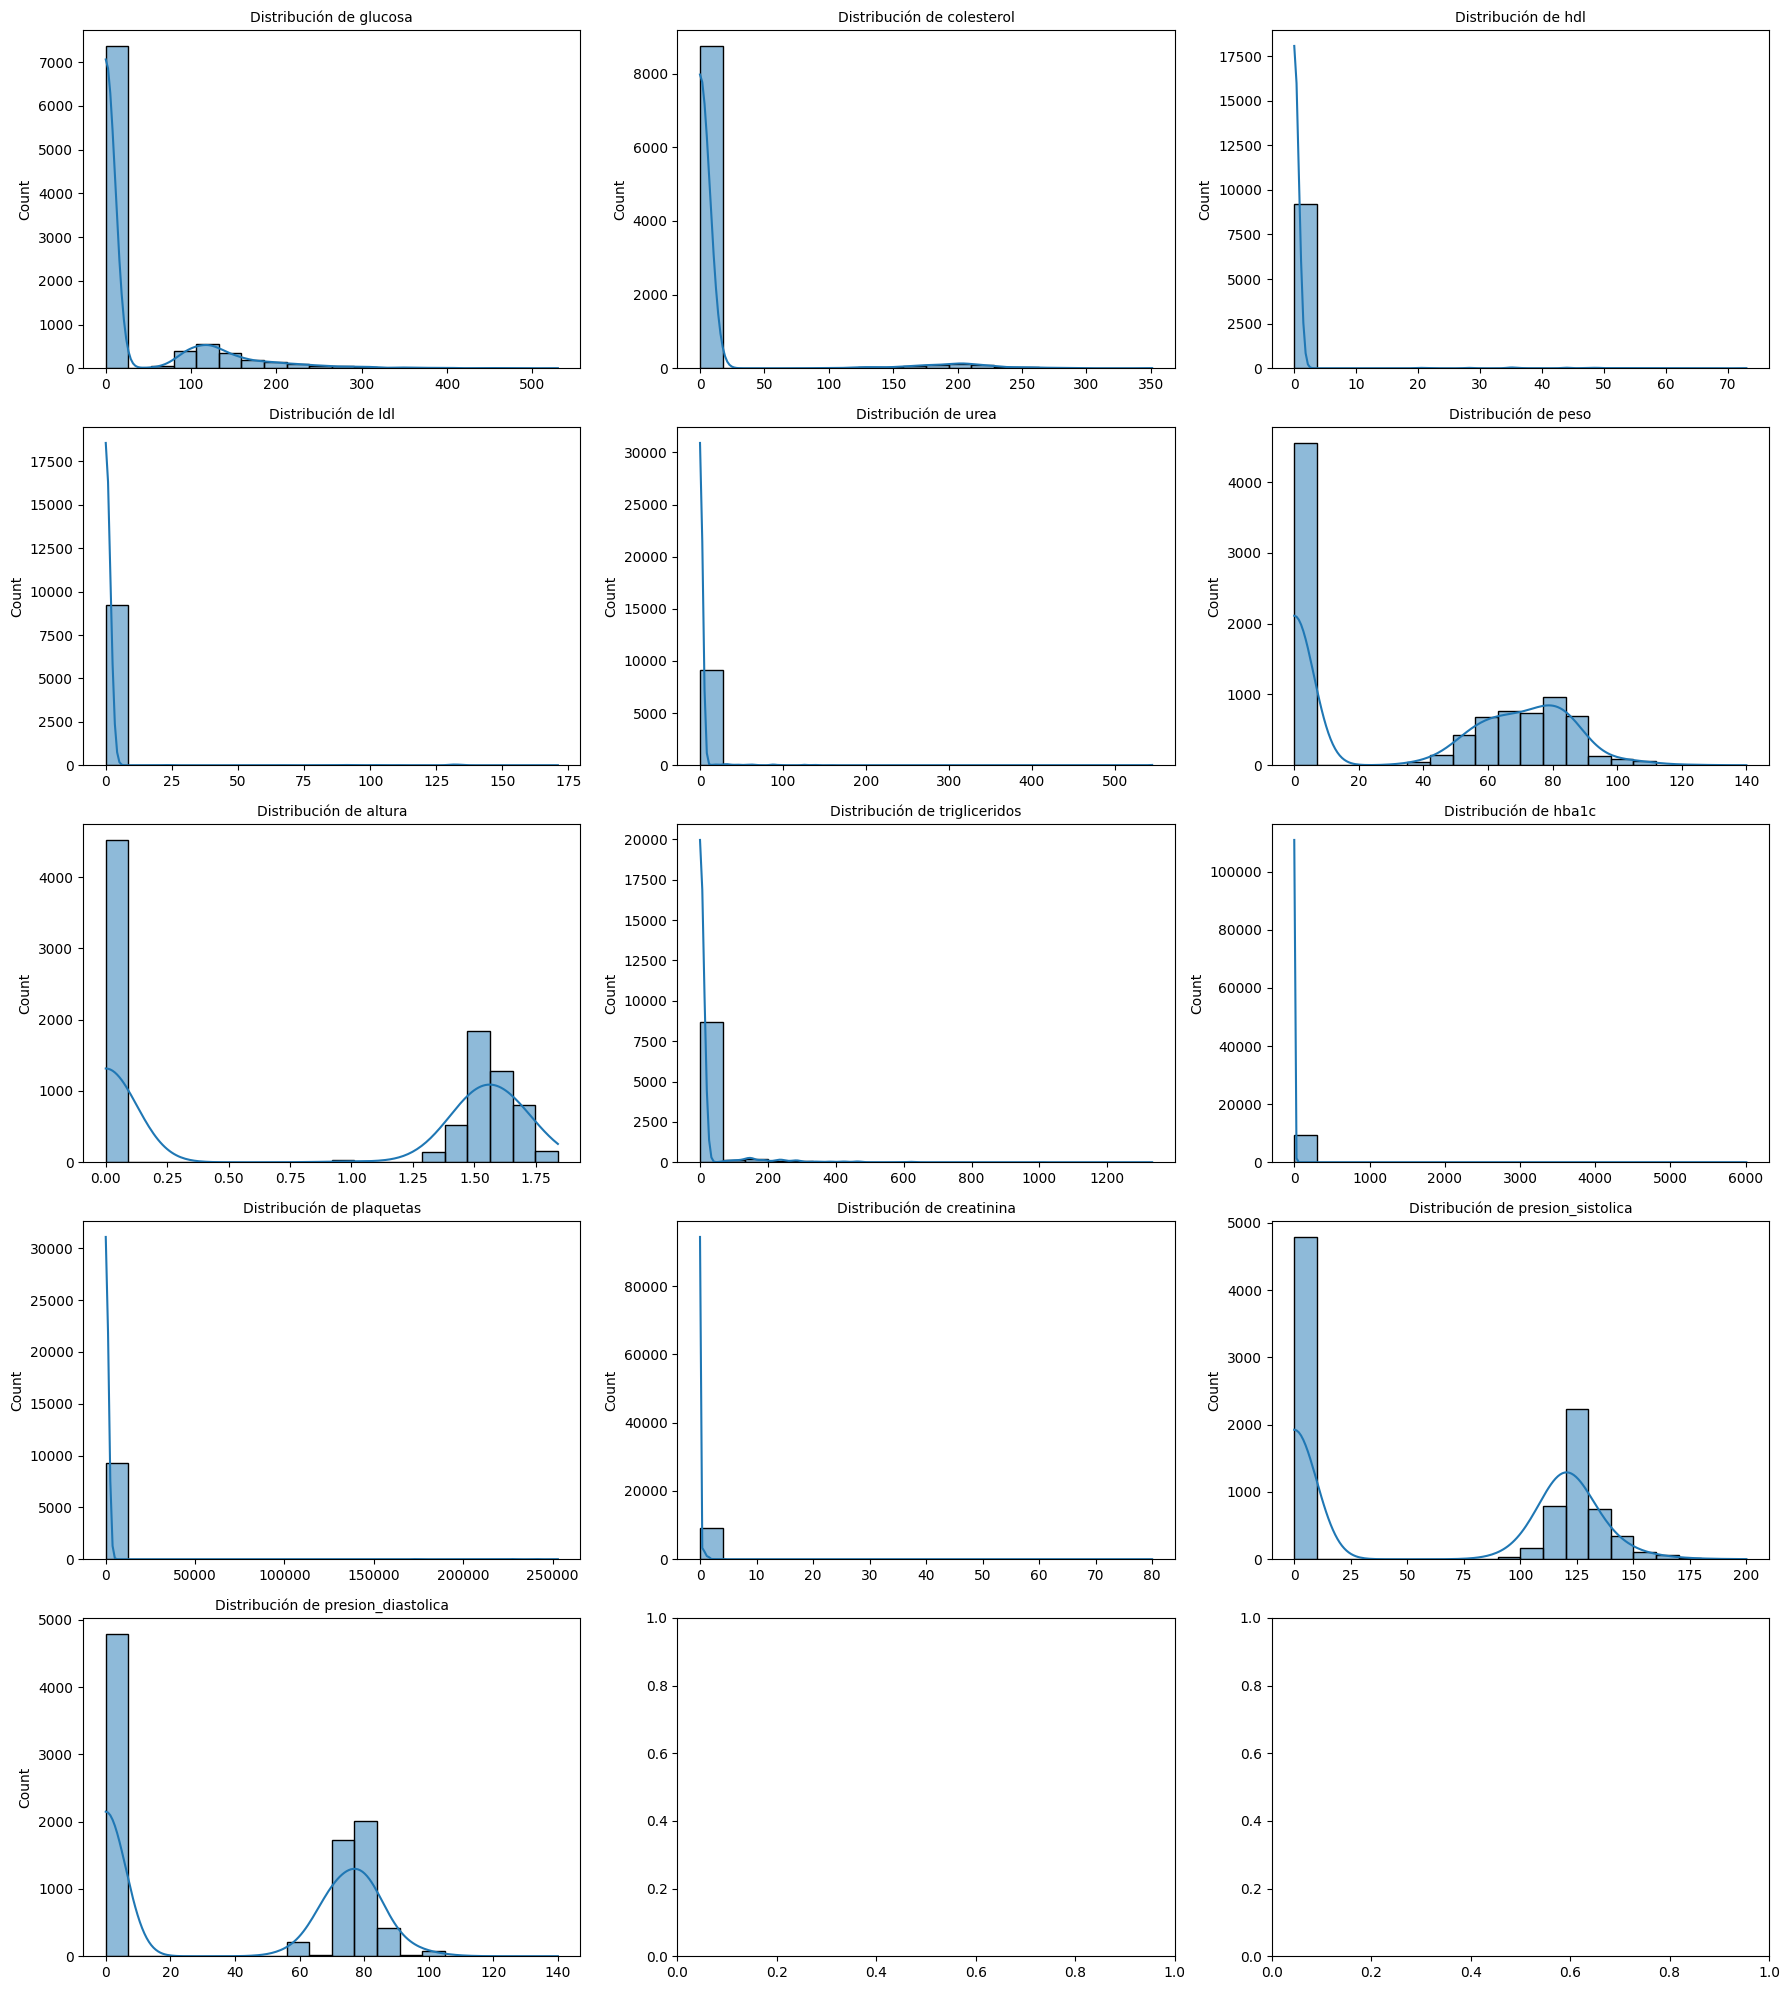

In [17]:
df = pd.read_csv('../materials/DM_proc.csv')
numeric_vars = ['glucosa', 'colesterol', 'hdl', 'ldl', 'urea', 'peso', 'altura', 'trigliceridos', 'hba1c', 
                     'plaquetas', 'creatinina', 'presion_sistolica', 'presion_diastolica' ]

def analisis_distribuciones(df, numeric_vars):
    # Histogramas
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    axes = axes.flatten()
    
    for i, var in enumerate(numeric_vars):
        sns.histplot(df[var].dropna(), kde=True, ax=axes[i], bins=20)
        axes[i].set_title(f'Distribución de {var}', fontsize=10)
        axes[i].set_xlabel('')
    
    plt.tight_layout()
    plt.show()

analisis_distribuciones(df, numeric_vars)





In [18]:
Q1 = df["glucosa"].quantile(0.25)
Q3 = df["glucosa"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["glucosa"] < Q1 - 1.5*IQR) | (df["glucosa"] > Q3 + 1.5*IQR)]

print(f"Total de outliers: {len(outliers)}")
print(f"Rango de outliers: {outliers['glucosa'].min()} - {outliers['glucosa'].max()} mg/dL")
print("\nResumen estadístico:")
print(outliers["glucosa"].describe())

Total de outliers: 1958
Rango de outliers: 1.0 - 530.0 mg/dL

Resumen estadístico:
count    1958.000000
mean      150.354035
std        67.435598
min         1.000000
25%       107.000000
50%       130.000000
75%       175.750000
max       530.000000
Name: glucosa, dtype: float64


In [19]:
def verificar_integridad(df):
    print("=== Resumen de integridad de datos ===")
    
    # Verificar duplicados
    print(f"\nDuplicados completos: {df.duplicated().sum()}")
    
    # Verificar inconsistencias en formatos
    print("\nFormatos inconsistentes:")
    print(f"Fecha más antigua: {df['fecha_consulta'].min()}")
    print(f"Fecha más reciente: {df['fecha_consulta'].max()}")
    
    # Verificar curps únicos
    print(f"\nCX_CURP únicos: {df['cx_curp'].nunique()} de {len(df)}")
    
verificar_integridad(df)

=== Resumen de integridad de datos ===

Duplicados completos: 51

Formatos inconsistentes:
Fecha más antigua: 2003-11-19 17:39:18.500
Fecha más reciente: 2021-08-02 18:32:22.237

CX_CURP únicos: 55 de 9315


C:\Users\Martín Romero\AppData\Local\Temp\ipykernel_14200\1538324167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="Reds_r")


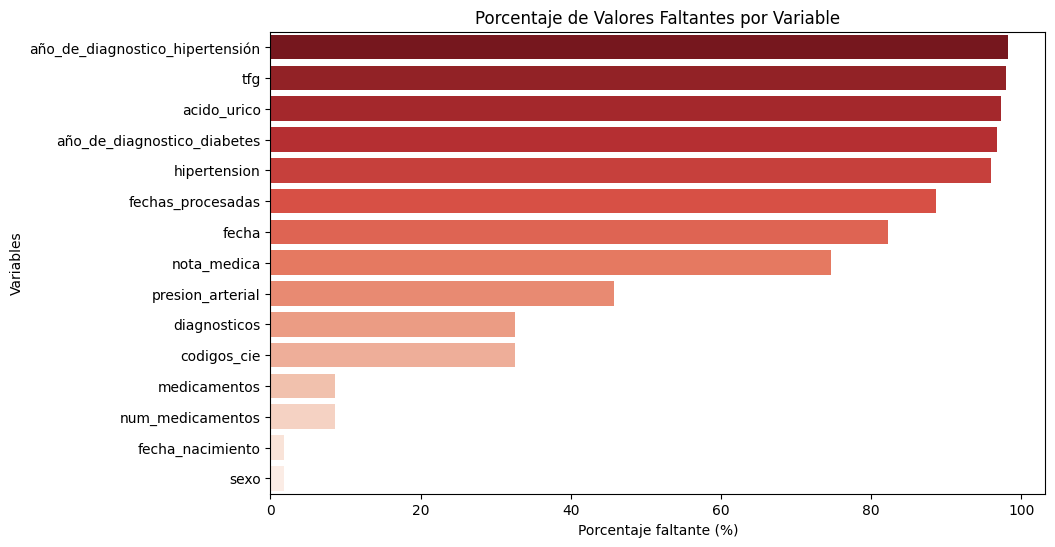

In [20]:
def analisis_faltantes(df):
    # Porcentaje de valores faltantes
    missing = df.isna().mean().sort_values(ascending=False) * 100
    missing = missing[missing > 0]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.values, y=missing.index, palette="Reds_r")
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xlabel('Porcentaje faltante (%)')
    plt.ylabel('Variables')
    plt.show()
    
    return missing

missing_report = analisis_faltantes(df)

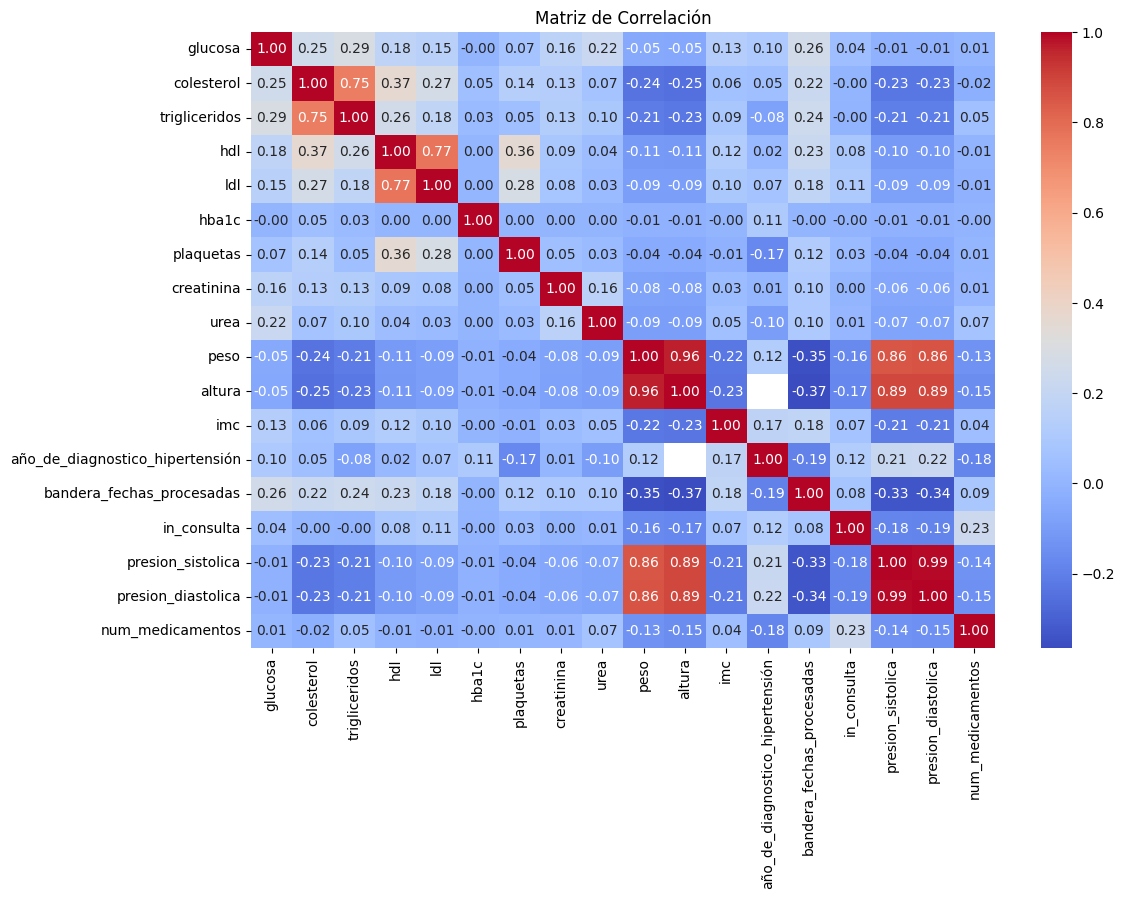

In [21]:
# Análisis de correlaciones
def analisis_correlaciones(df):
    # Seleccionar variables numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación')
    plt.show()

analisis_correlaciones(df)

3.2. Preguntas guia
1. ¿Los pacientes con múltiples medicamentos tienen mayor riesgo? Con la matriz de correlación parece que no, sin embargo, se podrían categorizar los medicamnetos para ver que tipo de medicamentos estan más relacionados con el tratamiento o la prevención de la diabetes
2. ¿Cómo afecta la edad al desarrollo de la db? Si se tuviera la edad, Se podría calcular la el IMC y obtener más datos.
3. ¿Los valores anormales de presión arterial son correctos, ya que eso afectaría al modelo?

3.3. Pregunta general para ML
¿Podemos predecir el desarrollo de la diabetes de un paciente basándonos en sus características demográficas?"